# Analyse exploratoire
---

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Implémentation des données
---

In [3]:
df_lookup = pd.read_csv('./Datasets/dataset/ydata-ymusic-artist-names-v1_0.txt', sep='\t',header=None, encoding="ISO-8859-1", names=['artist_id', 'artist_name'])

In [4]:
df_lookup.set_index('artist_id', inplace=True)

In [5]:
df_lookup

,artist_name
artist_id,
-100,Not Applicable
-99,Unknown Artist
1000001,"Bobby ""O"""
1000002,"Jimmy ""Z"""
1000003,'68 Comeback
...,...
1101110,14 Karat Soul
1101111,The Relativez
1101112,Crooked I


In [6]:
df_ratings = pd.read_csv('./Datasets/dataset/ydata-ymusic-user-artist-ratings-v1_0.txt', sep='\t',header=None, encoding="ISO-8859-1", names=['user_id', 'artist_id','ratings'])

In [7]:
df_ratings.head()

,user_id,artist_id,ratings
0,1,1000125,90
1,1,1006373,100
2,1,1006978,90
3,1,1007035,100
4,1,1007098,100


## Analyse des données
---

Regardons la répartition des notes par utilisateur et par artiste.     
Notons que la note 255 est donnée lorsque l'utilisateur ne souhaite plus du tout écouter cet artiste et peut donc être remplacée par la note minimale.

In [124]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

[Text(0, 0.5, 'proportion des notes'), Text(0.5, 0, 'notes des utilisateurs')]

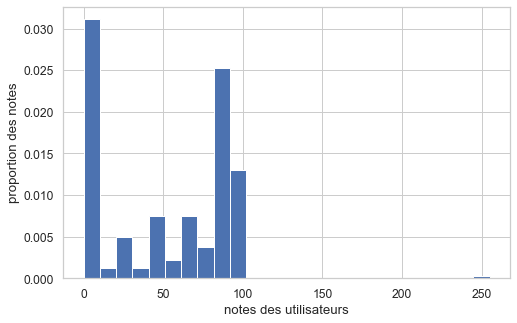

In [24]:
sns.distplot(
    df_ratings['ratings'], bins=25, norm_hist=True, kde=False, hist_kws={"alpha":1}
).set(xlabel='notes des utilisateurs', ylabel='proportion des notes')

In [17]:
# Nombre de 255
df_ratings[df_ratings.ratings == 255].shape[0]

(330865, 3)

In [19]:
total_ratings = df_ratings.shape[0]
total_ratings

115579440

In [21]:
df_ratings.describe()

,user_id,artist_id,ratings
count,1.155794e+08,1.155794e+08,1.155794e+08
mean,9.723561e+05,1.033967e+06,5.299802e+01
std,5.624985e+05,3.285526e+04,4.150656e+01
min,1.000000e+00,-1.000000e+02,0.000000e+00
25%,4.857280e+05,1.012779e+06,0.000000e+00
50%,9.718900e+05,1.024672e+06,7.000000e+01
75%,1.459585e+06,1.044605e+06,9.000000e+01
max,1.948882e+06,1.101749e+06,2.550000e+02


In [22]:
df_ratings['ratings'].isna().sum()

0

Etant donnée la proportion de 0 dans les notes attribuées on peut en déduire que ce sont des notes non attribuées.
Les vrais 0 correspondent aux 255.

In [26]:
df_ratings.replace(0, np.nan, inplace=True)
df_ratings.replace(255, 0, inplace=True)

[Text(0, 0.5, 'proportion des notes'), Text(0.5, 0, 'notes des utilisateurs')]

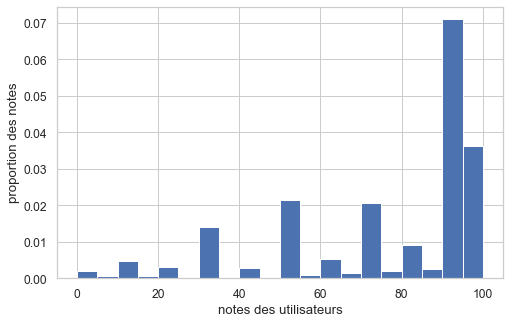

In [31]:
sns.distplot(
    df_ratings['ratings'], bins=20, norm_hist=True, kde=False, hist_kws={"alpha":1}
).set(xlabel='notes des utilisateurs', ylabel='proportion des notes')

Interessons nous maintenant a la proportion d'artistes notée et aux artistes les plus notés.

In [179]:
# Il ya 98213 artistes
total_items = df_ratings.artist_id.nunique()
total_items

98211

In [48]:
# 30% des données ne sont pas notées
df_ratings.isna().sum() / total_ratings

user_id      0.000000
artist_id    0.000000
ratings      0.295339
dtype: float64

In [51]:
df_ratings.groupby('artist_id').count().head()

,user_id,ratings
artist_id,,
-100,1,0
-99,1,0
1,3,2
4,1,1
10,12,6


In [57]:
df_ratings = df_ratings[df_ratings.artist_id != -100]

In [60]:
df_ratings = df_ratings.query('artist_id != -99')

In [61]:
df_artists = df_ratings.groupby('artist_id').count().sort_values(by='ratings', ascending=False)

In [63]:
df_artists.drop('user_id', axis='columns', inplace=True)

In [97]:
df_artists_rated = df_artists.query('ratings != 0')

In [98]:
df_artists_rated.reset_index(inplace=True)

In [99]:
df_artists_rated

,artist_id,ratings
0,1053507,664161
1,1098798,506290
2,1022226,488092
3,1037847,466585
4,1030879,462771
...,...,...
50075,1073572,1
50076,1037599,1
50077,1097687,1
50078,1031479,1


[Text(0, 0.5, '# notes'), Text(0.5, 0, 'artist_id')]

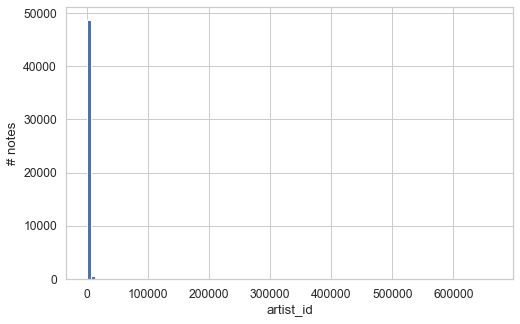

In [209]:
sns.distplot(
    df_artists_rated['ratings'], bins=100, norm_hist=False, kde=False, hist_kws={"alpha":1}
).set(xlabel='artist_id', ylabel='# notes')

La majeure partie des artistes n'est notée que par une poignée d'utilisateurs avec une moyenne de 1626 notes par artiste

In [105]:
df_artists_rated.mean().ratings

1626.2851238019168

In [118]:
df_artists_rated_most = df_artists.query(' 0 < ratings < 100').sort_values(by='ratings', ascending=False)

[Text(0.5, 0, 'nombre de notes'),
 Text(0.5, 1.0, 'Distribution du nombre de notes')]

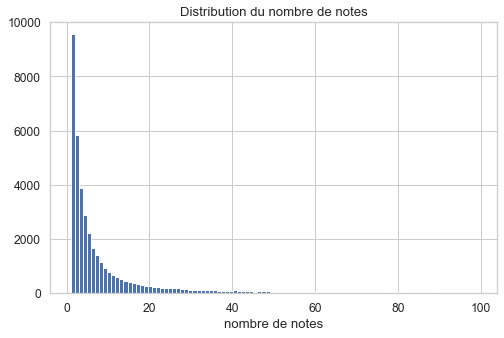

In [125]:
sns.distplot(
    df_artists_rated_most['ratings'], bins=100, norm_hist=False, kde=False, hist_kws={"alpha":1}
).set(xlabel='nombre de notes', title='Distribution du nombre de notes')

Regardons la répartition au sein des artistes les plus notés

In [202]:
df_artists_pop = df_artists.query('ratings > 35')

In [203]:
df_artists_pop

,ratings
artist_id,
1053507,664161
1098798,506290
1022226,488092
1037847,466585
1030879,462771
...,...
1002189,36
1012656,36
1019136,36


[Text(0.5, 0, 'nombre de notes'),
 Text(0.5, 1.0, 'Distribution du nombre de notes')]

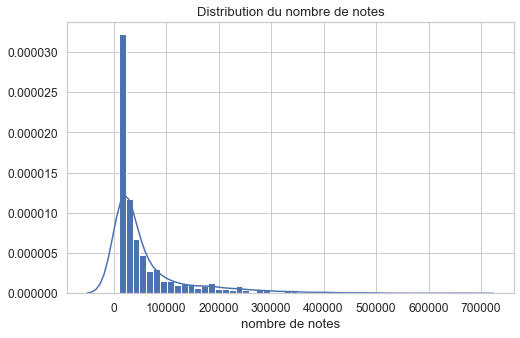

In [191]:
sns.distplot(
    df_artists_pop['ratings'], bins=50, norm_hist=False, kde=True, hist_kws={"alpha":1}
).set(xlabel='nombre de notes', title='Distribution du nombre de notes')

In [155]:
df_artists_pop.reset_index(inplace=True)

In [158]:
df_artists_rated_most.reset_index(inplace=True)

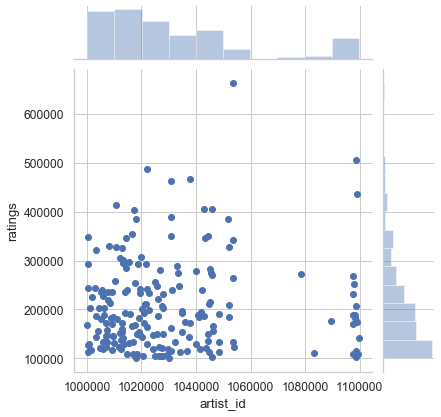

In [160]:
sns.jointplot(x='artist_id', y='ratings', data=df_artists_pop)

L'id de l'artiste n'a pas de réelle corrélation avec sa popularité ce qui est assez rassurant

On déduit également de cette analyse de distribution que l'algorithme de recommendation devra être adapté pour ne pas recommender que les artistes ayant recu le plus de notes.           
Il s'agira d'optimiser son **taux de couverture** des différents items.

In [162]:
df_user = df_ratings.groupby('user_id').count()
df_user.drop('artist_id', axis='columns', inplace=True)

In [163]:
df_user.reset_index(inplace=True)

In [165]:
df_user.sort_values(by='ratings', ascending=False, inplace=True)

[Text(0.5, 0, 'Nombre de notes'), Text(0.5, 1.0, 'Distribution des notes')]

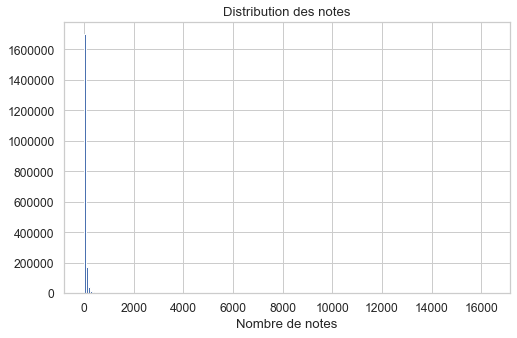

In [168]:
sns.distplot(
    df_user['ratings'], bins=200, norm_hist=False, kde=False, hist_kws={"alpha":1}
).set(xlabel='Nombre de notes', title='Distribution des notes')

In [170]:
# 8632 utilisateurs n'ont noté aucun artiste, ce qui représente 0.44%
df_user.query('ratings == 0').shape[0]

8632

In [172]:
total_users = df_user.shape[0]
total_users

1948882

Encore une fois la majeure partie des utilisateurs ont noté une poignée d'artistes

In [174]:
df_user.max()

user_id    1948882
ratings      16357
dtype: int64

In [205]:
df_user.query('ratings >2').shape[0]/total_users

0.8454888495044851

In [180]:
total_items, total_users

(98211, 1948882)

### Conclusion
---

Après avoir analysé le jeu de données on n'utilisera que les *items* ayant recu plus de 35 notes, représentant 12976 *items* ce qui est suffisant pour l'entraînement du modèle.

Les méthodes de filtrage collaboratif fonctionnent correctement pour les utilisateurs ayant notés plus de 2 *items* ce qui représente ici **85%** des utilisateurs.                  
Afin de couvrir les **15%** restants il faudra opter pour une autre méthode. 

Les notes sont réparties sur une échelle de 0 a 100 avec un fort *biais positif*, les utilisateurs ne sont généralement pas très critiques vis-à-vis de l'artiste.

La méthode de filtrage collaboratif par voisinage choisie sera **'item-based'** au vu du nombre d'utilisateurs.